In [ ]:
from google.colab import files
files.upload() #upload kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sizlingdhairya1/alzheimers-4
!unzip alzheimers-4.zip

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/NonDemented/31 (10).jpg  
  inflating: Datasets/NonDemented/31 (100).jpg  
  inflating: Datasets/NonDemented/31 (11).jpg  
  inflating: Datasets/NonDemented/31 (12).jpg  
  inflating: Datasets/NonDemented/31 (13).jpg  
  inflating: Datasets/NonDemented/31 (14).jpg  
  inflating: Datasets/NonDemented/31 (15).jpg  
  inflating: Datasets/NonDemented/31 (16).jpg  
  inflating: Datasets/NonDemented/31 (17).jpg  
  inflating: Datasets/NonDemented/31 (18).jpg  
  inflating: Datasets/NonDemented/31 (19).jpg  
  inflating: Datasets/NonDemented/31 (2).jpg  
  inflating: Datasets/NonDemented/31 (20).jpg  
  inflating: Datasets/NonDemented/31 (21).jpg  
  inflating: Datasets/NonDemented/31 (22).jpg  
  inflating: Datasets/NonDemented/31 (23).jpg  
  inflating: Datasets/NonDemented/31 (24).jpg  
  inflating: Datasets/NonDemented/31 (25).jpg  
  inflating: Datasets/NonDemented/31 (26).jpg  
  inflating: Datasets/NonDemented/31 

In [1]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
import shutil
SIZE=128
path='Datasets/'
clss=len(os.listdir(path))
k=1
data=[]
x=os.listdir(path)
labels=[]
aa=-1
k=-1
for filename in x:
    y=os.listdir(path+filename+'/')
    aa=aa+1
    k=k+1
    for file in y:
        img=cv2.imread(path+filename+'/'+file)
        img = cv2.resize(img, (SIZE, SIZE))
        data.append(img)
        labels.append(k)

data = np.array(data)
labels = np.array(labels)
X_train, X_test, y_train, y_test1 = train_test_split(data, labels, test_size=0.20,random_state = 50)

#Reshape input data
X_train = X_train.reshape(X_train.shape[0], SIZE, SIZE, 3)
X_test = X_test.reshape(X_test.shape[0], SIZE, SIZE, 3)

#Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#One hot encoding of outputs
y_train = np_utils.to_categorical(y_train, clss)
y_test = np_utils.to_categorical(y_test1, clss)
num_classes = y_test.shape[1]
import cv2
import os
import matplotlib.pyplot as plt
img1=cv2.imread("/content/Datasets/MildDemented/26 (19).jpg")
img2=cv2.imread("/content/Datasets/ModerateDemented/27 (2).jpg")
img3=cv2.imread("/content/Datasets/NonDemented/26 (100).jpg")
img4=cv2.imread("/content/Datasets/VeryMildDemented/26 (44).jpg")
plt.figure()
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("MildDemented="+str(len(os.listdir("/content/Datasets/MildDemented/"))))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Lentingo="+str(len(os.listdir("/content/Datasets/ModerateDemented/"))))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title("NonDemented="+str(len(os.listdir("/content/Datasets/NonDemented/"))))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title("VeryMildDemented="+str(len(os.listdir("/content/Datasets/VeryMildDemented/"))))

FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
import time
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(SIZE,SIZE,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(clss, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer=tf.optimizers.SGD(lr=0.001),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
#Fit the model
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20,batch_size=32,verbose=1)

Epoch 1/20
160/160 [==============================] - 21s 42ms/step - loss: 1.4378 - accuracy: 0.4764 - val_loss: 1.0395 - val_accuracy: 0.5016
Epoch 2/20
160/160 [==============================] - 5s 31ms/step - loss: 0.9515 - accuracy: 0.5309 - val_loss: 0.9338 - val_accuracy: 0.5109
Epoch 3/20
160/160 [==============================] - 4s 24ms/step - loss: 0.9084 - accuracy: 0.5410 - val_loss: 2.0165 - val_accuracy: 0.4984
Epoch 4/20
160/160 [==============================] - 4s 23ms/step - loss: 0.8837 - accuracy: 0.5629 - val_loss: 1.1518 - val_accuracy: 0.3211
Epoch 5/20
160/160 [==============================] - 4s 24ms/step - loss: 0.8536 - accuracy: 0.5848 - val_loss: 0.8641 - val_accuracy: 0.5641
Epoch 6/20
160/160 [==============================] - 4s 22ms/step - loss: 0.8170 - accuracy: 0.6189 - val_loss: 1.2672 - val_accuracy: 0.5320
Epoch 7/20
160/160 [==============================] - 4s 23ms/step - loss: 0.7519 - accuracy: 0.6559 - val_loss: 0.7723 - val_accuracy: 0.673

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test1, y_pred))
print('Classification Report')
print(classification_report(y_test1, y_pred,target_names=os.listdir(path)))

40/40 [==============================] - 1s 9ms/step
Confusion Matrix
[[ 97 332  10   1]
 [  1 634   0   0]
 [  1  52 139   0]
 [  0   7   1   5]]
Classification Report
                  precision    recall  f1-score   support

VeryMildDemented       0.98      0.22      0.36       440
     NonDemented       0.62      1.00      0.76       635
    MildDemented       0.93      0.72      0.81       192
ModerateDemented       0.83      0.38      0.53        13

        accuracy                           0.68      1280
       macro avg       0.84      0.58      0.62      1280
    weighted avg       0.79      0.68      0.63      1280



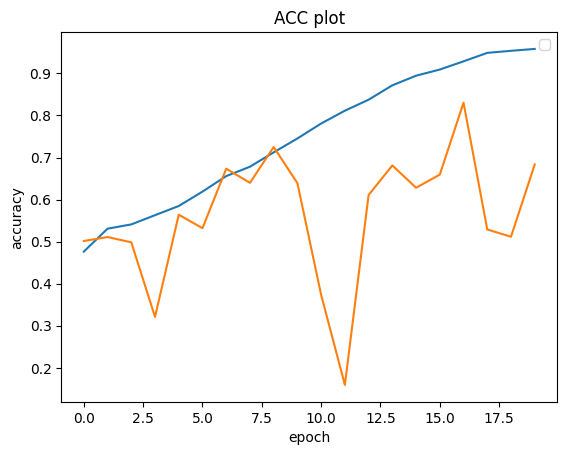

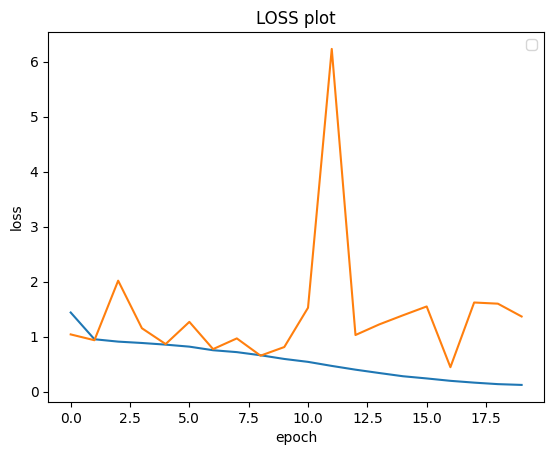

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy result
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ACC plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# Plot loss result
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

1/1 [==============================] - 0s 275ms/step


Text(0.5, 1.0, 'Prediction: ModerateDemented')

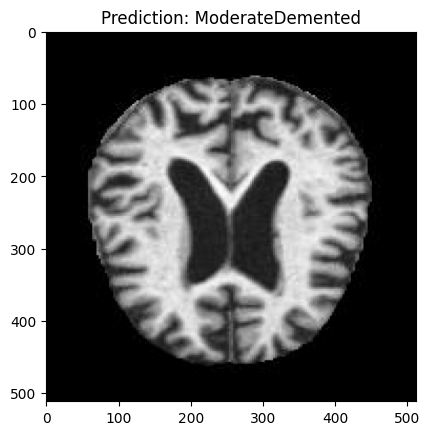

In [ ]:
import  numpy as np
import cv2
path1="/content/Datasets/ModerateDemented/28 (2).jpg"
categories = os.listdir(path)
nimage = cv2.imread(path1)
image = cv2.resize(nimage,(SIZE,SIZE))
image = image/255.0
prediction = model.predict(np.array(image).reshape(-1,SIZE,SIZE,3))
pclass = np.argmax(prediction)
img=cv2.imread(path1)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(512,512), interpolation = cv2.INTER_AREA)
import matplotlib.pyplot as plt
plt.imshow(img)
pValue = "Prediction: {0}".format(categories[int(pclass)])
plt.title(pValue)